Peyton Hall

QBIO460: Intro to Machine Learning

Assignment 10

In this assignment, you will build and evaluate a Convolutional Neural Network (CNN) using
Keras to classify chest X-ray images into "Normal" and "Pneumonia" categories. The dataset
contains labeled images that will require basic preprocessing, such as resizing and
normalization. This exercise will help you understand how to work with real-world image data
and apply deep learning techniques to a classification problem.

In [2]:
# load 
import os
import pandas as pd
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array


from PIL import Image
from sklearn.model_selection import train_test_split

Part 1: Data Preparation

1. Data Loading: Load the chest X-ray dataset and display 3 images each from the
"Normal" and "Pneumonia" classes side by side using matplotlib.

In [3]:
normal_dir = '/Users/peytonhall/downloads/train/NORMAL'
pneumonia_dir = '/Users/peytonhall/downloads/train/PNEUMONIA'

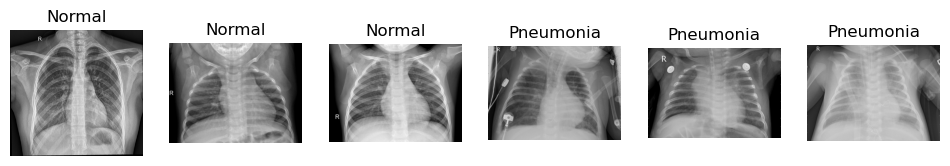

In [4]:
# Load and display three images from each class
fig, axes = plt.subplots(1, 6, figsize=(12, 4))

# Load 3 Normal images
normal_images = os.listdir(normal_dir)[:3]
for i, img_name in enumerate(normal_images):
    img_path = os.path.join(normal_dir, img_name)
    img = load_img(img_path)
    img_array = img_to_array(img)
    axes[i].imshow(img_array / 255.0)  # Normalize to [0, 1]
    axes[i].set_title("Normal")
    axes[i].axis('off')

# Load 3 Pneumonia images
pneumonia_images = os.listdir(pneumonia_dir)[:3]
for i, img_name in enumerate(pneumonia_images):
    img_path = os.path.join(pneumonia_dir, img_name)
    img = load_img(img_path)
    img_array = img_to_array(img)
    axes[i+3].imshow(img_array / 255.0)  # Normalize to [0, 1]
    axes[i+3].set_title("Pneumonia")
    axes[i+3].axis('off')

plt.show()


2. Data Preprocessing: Resize all images to 64×64 pixels and normalize their pixel values
to the range [0, 1]. Split the training data into an 80%-20% split for training and
validation. Report the shape of the resulting datasets

In [5]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np

# Function to load and preprocess images
def load_and_preprocess_images(class_dir, label, image_size=(64, 64)):
    images = []
    labels = []
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  
        images.append(img_array)
        labels.append(label)
    return images, labels

# Load and preprocess "Normal" and "Pneumonia" images
normal_images, normal_labels = load_and_preprocess_images(normal_dir, 0)
pneumonia_images, pneumonia_labels = load_and_preprocess_images(pneumonia_dir, 1)

# Combine the datasets
images = np.array(normal_images + pneumonia_images)
labels = np.array(normal_labels + pneumonia_labels)

# Split into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Report the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (4172, 64, 64, 3)
Validation data shape: (1044, 64, 64, 3)


3. Class Distribution: Count the number of samples in each class ("Normal" and
"Pneumonia"). Create a bar plot to show the class distribution in each class

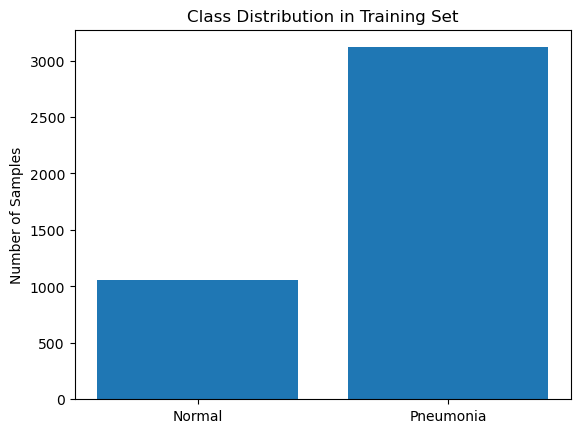

In [6]:
import matplotlib.pyplot as plt

# Count the number of samples in each class
unique, counts = np.unique(y_train, return_counts=True)

# Plot the class distribution
plt.bar(unique, counts)
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Samples")
plt.show()

4. Balancing the Training Set: The training set may have an imbalance between the two
classes. Balance the training set by randomly selecting samples from the majority class
("Pneumonia") to match the number of samples in the minority class ("Normal"). Show
the class distribution of the balanced training set using a bar plot

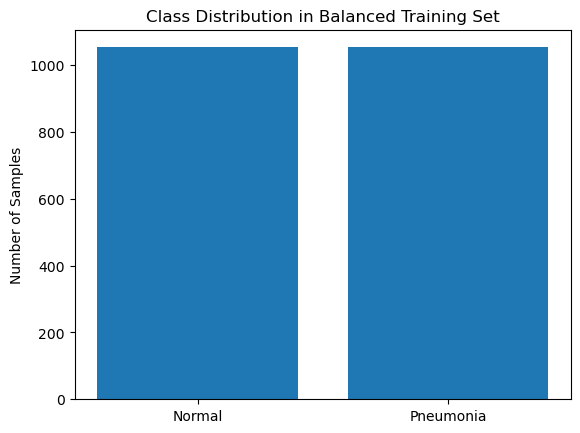

In [7]:
from sklearn.utils import resample

# Separate the training set into two classes
X_train_normal = X_train[y_train == 0]
X_train_pneumonia = X_train[y_train == 1]

# Resample the "Pneumonia" class to match the number of "Normal" samples
X_train_pneumonia_resampled = resample(X_train_pneumonia, 
                                       replace=False, 
                                       n_samples=len(X_train_normal), 
                                       random_state=42)

# Combine the resampled "Pneumonia" with "Normal"
X_train_balanced = np.concatenate([X_train_normal, X_train_pneumonia_resampled])
y_train_balanced = np.concatenate([np.zeros(len(X_train_normal)), np.ones(len(X_train_pneumonia_resampled))])

# Plot the class distribution of the balanced training set
unique, counts = np.unique(y_train_balanced, return_counts=True)
plt.bar(unique, counts)
plt.xticks([0, 1], ['Normal', 'Pneumonia'])
plt.title("Class Distribution in Balanced Training Set")
plt.ylabel("Number of Samples")
plt.show()

Part 2: Model Building

1. Define the CNN Architecture: Build a Convolutional Neural Network (CNN) using Keras
with the following specifications:
○ Input layer that matches the shape of your preprocessed images (64×64×3).
○ Two convolutional layers with 3×3 filters, ReLU activation, and max-pooling (2×2)
layers.
○ A fully connected (dense) layer with 128 neurons and a dropout layer to prevent
overfitting.
○ An output layer for binary classification using softmax activation.
○ Print the model summary using model.summary().

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    # layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # flatten layers
    Flatten(),
    Dense(128, activation='relu'),
    # add dropout for half the neurons
    Dropout(0.5),  

    # Output layer
    Dense(2, activation='softmax')  # Binary classification (Normal and Pneumonia)
])

# Print the model summary
model.summary()


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

2. Compile the Model: Use the Adam optimizer, categorical cross-entropy as the
loss function, and accuracy as the evaluation metric.

In [9]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

3. Train the Model: Train the CNN for 20 epochs using the balanced training set with a
batch size of 64. Use the validation set to monitor performance during training.

In [10]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_balanced = to_categorical(y_train_balanced, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# Train the model
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.4954 - loss: 0.8182 - val_accuracy: 0.9052 - val_loss: 0.5524
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.8070 - loss: 0.4636 - val_accuracy: 0.9377 - val_loss: 0.1689
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.9076 - loss: 0.2422 - val_accuracy: 0.9492 - val_loss: 0.1530
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.9434 - loss: 0.1641 - val_accuracy: 0.9588 - val_loss: 0.1146
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.9618 - loss: 0.1248 - val_accuracy: 0.9607 - val_loss: 0.1195
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 189ms/step - accuracy: 0.9625 - loss: 0.1196 - val_accuracy: 0.9464 - val_loss: 0.1418
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.9648 - loss: 0.1031 - val_accuracy: 0.9425 - val_loss: 0.1508
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.9599 - loss: 0.1040 - val_accuracy: 0.

4. Visualize the Training Process: Plot the training and validation loss over the 20 epochs
to visualize the training process. Discuss what you observe on the plot.

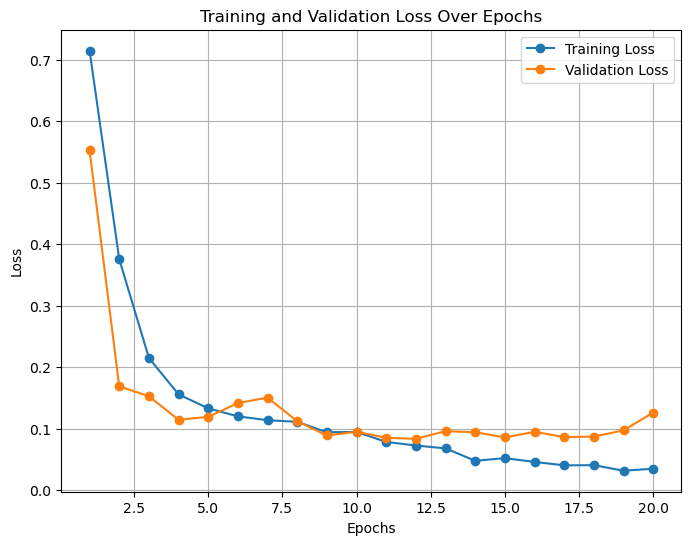

In [11]:
import matplotlib.pyplot as plt

# Extract loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, 21), val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Part 3: Hyperparameter Tuning and Model Evaluation

1. Experiment with Hyperparameters: Train the CNN by varying the following
hyperparameters:
○ Batch Sizes: 16, 32, 64
○ Filter Sizes: (3×3), (5×5), (7×7)
○ Number of Filters: (32,64), (64,128)

For each combination of hyperparameters, train the model for 20 epochs and record the
validation accuracy

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [20]:
# hyperparameters
batch_sizes = [16, 32, 64]
filter_sizes = [(3, 3), (5, 5), (7, 7)]
num_filters = [(32, 64), (64, 128)]

In [21]:
# init results
results = []

# loop through combinations
for batch_size in batch_sizes:
    for filter_size in filter_sizes:
        for filters in num_filters:
            # model
            model = Sequential([
                # layer one
                Conv2D(filters[0], filter_size, activation='relu', input_shape=(64, 64, 3)),
                MaxPooling2D(pool_size=(2, 2)),
                
                # layer 2
                Conv2D(filters[1], filter_size, activation='relu'),
                MaxPooling2D(pool_size=(2, 2)),
                
                # flatten, dense, dropout half the neurons
                Flatten(),
                Dense(128, activation='relu'),
                Dropout(0.5),
                Dense(2, activation='softmax')
            ])
            
            # compile the model
            model.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
            
            # train the model
            history = model.fit(
                X_train_balanced, y_train_balanced,
                validation_data=(X_val, y_val),
                epochs=10, # train the model for 20 epochs - i changed to 10 it took way too long apologies
                batch_size=batch_size,
                verbose=1 # i need to see whats goin on its taking too long
            )
            
            # record validation accuracy 
            final_val_accuracy = history.history['val_accuracy'][-1]
            results.append({
                'batch_size': batch_size,
                'filter_size': filter_size,
                'num_filters': filters,
                'val_accuracy': final_val_accuracy,
                'history': history
            })

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.6899 - loss: 0.5982 - val_accuracy: 0.9454 - val_loss: 0.1679
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9283 - loss: 0.1998 - val_accuracy: 0.9550 - val_loss: 0.1487
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9374 - loss: 0.1781 - val_accuracy: 0.9588 - val_loss: 0.1201
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9506 - loss: 0.1397 - val_accuracy: 0.9559 - val_loss: 0.1111
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9555 - loss: 0.1255 - val_accuracy: 0.9579 - val_loss: 0.1111
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9645 - loss: 0.1049 - val_accuracy: 0.9607 - val_loss: 0.1057
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9740 - loss: 0.0733 - val_accuracy: 0.9665 - val_loss: 0.0974
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9714 - loss: 0.0834 - val_accu

Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 54s 404ms/step - accuracy: 0.6333 - loss: 0.6630 - val_accuracy: 0.9205 - val_loss: 0.2211
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 49s 374ms/step - accuracy: 0.9043 - loss: 0.2485 - val_accuracy: 0.9061 - val_loss: 0.2309
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 49s 374ms/step - accuracy: 0.8918 - loss: 0.2605 - val_accuracy: 0.9282 - val_loss: 0.1791
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 46s 345ms/step - accuracy: 0.9325 - loss: 0.1697 - val_accuracy: 0.9128 - val_loss: 0.2284
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 44s 336ms/step - accuracy: 0.9364 - loss: 0.1712 - val_accuracy: 0.9559 - val_loss: 0.1267
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 44s 337ms/step - accuracy: 0.9507 - loss: 0.1446 - val_accuracy: 0.9559 - val_loss: 0.1317
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 344ms/step - accuracy: 0.9445 - loss: 0.1477 - val_accuracy: 0.9435 - val_loss: 0.1564
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 45s 340ms/step - accuracy: 0.9395 - loss: 0

66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 248ms/step - accuracy: 0.6115 - loss: 0.6705 - val_accuracy: 0.8803 - val_loss: 0.2778
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - accuracy: 0.8977 - loss: 0.2469 - val_accuracy: 0.9416 - val_loss: 0.1518
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - accuracy: 0.9204 - loss: 0.2056 - val_accuracy: 0.9301 - val_loss: 0.1783
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - accuracy: 0.9233 - loss: 0.1959 - val_accuracy: 0.9406 - val_loss: 0.1542
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - accuracy: 0.9318 - loss: 0.1785 - val_accuracy: 0.9511 - val_loss: 0.1391
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - accuracy: 0.9461 - loss: 0.1448 - val_accuracy: 0.9243 - val_loss: 0.1923
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - accuracy: 0.9487 - loss: 0.1299 - val_accuracy: 0.9540 - val_loss: 0.1119
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.9529 - loss: 0.1374 - val_accuracy: 0.951

33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 930ms/step - accuracy: 0.5780 - loss: 0.8639 - val_accuracy: 0.9061 - val_loss: 0.2762
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 911ms/step - accuracy: 0.8827 - loss: 0.2711 - val_accuracy: 0.9540 - val_loss: 0.1284
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 931ms/step - accuracy: 0.9267 - loss: 0.1711 - val_accuracy: 0.9540 - val_loss: 0.1207
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 913ms/step - accuracy: 0.9378 - loss: 0.1492 - val_accuracy: 0.9579 - val_loss: 0.1208
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 986ms/step - accuracy: 0.9388 - loss: 0.1592 - val_accuracy: 0.9579 - val_loss: 0.1071
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 904ms/step - accuracy: 0.9482 - loss: 0.1374 - val_accuracy: 0.9320 - val_loss: 0.1900
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 986ms/step - accuracy: 0.9475 - loss: 0.1305 - val_accuracy: 0.9579 - val_loss: 0.1050
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 33s 991ms/step - accuracy: 0.9625 - loss: 0.1020 - val_accuracy: 0.911

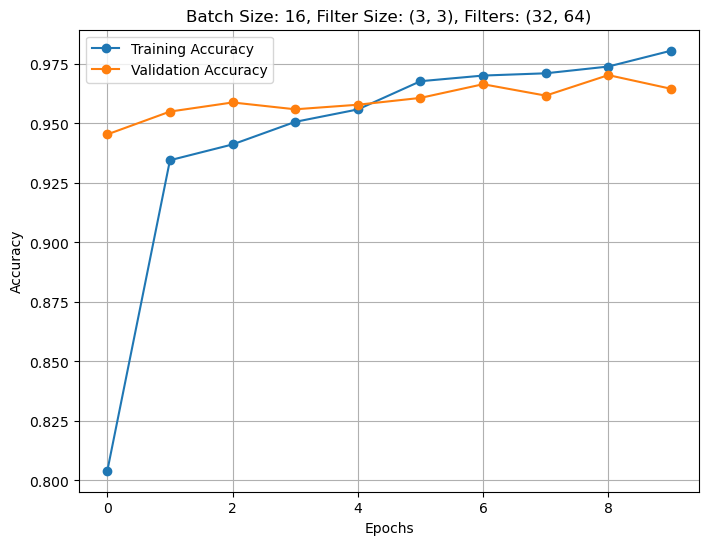

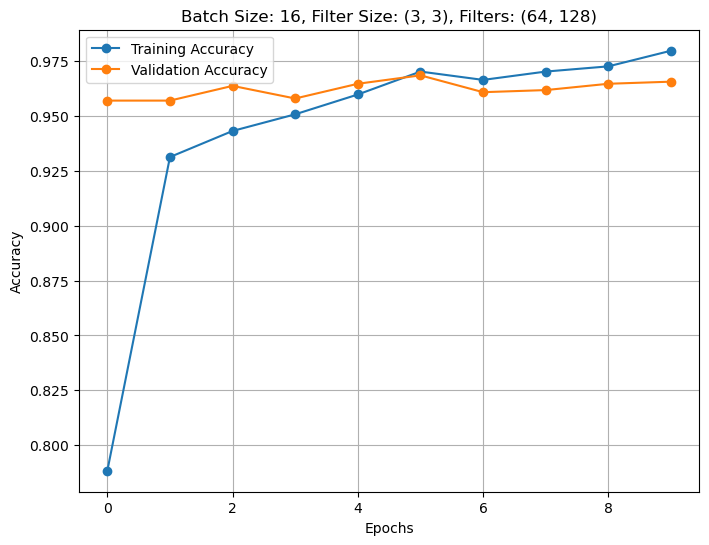

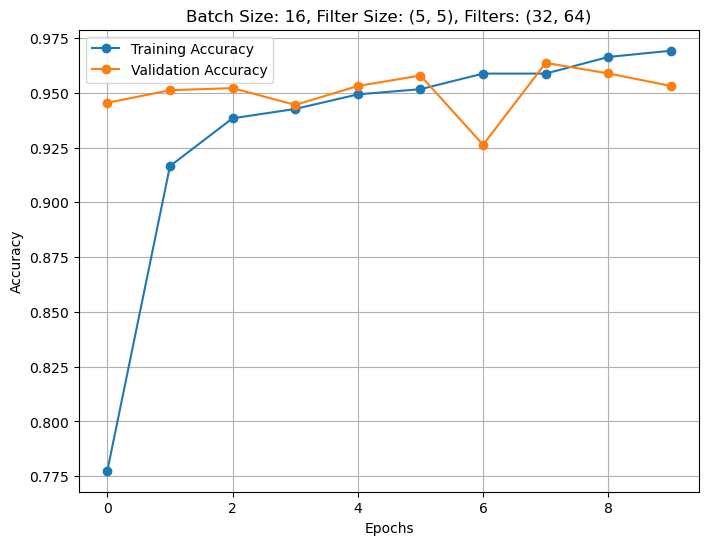

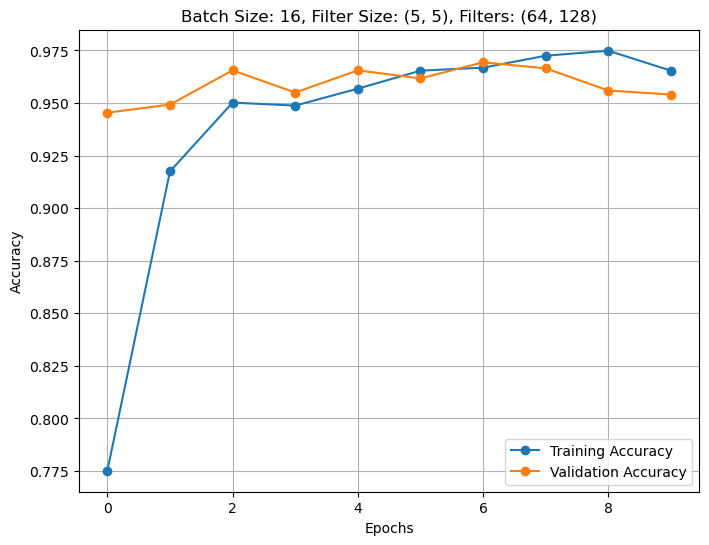

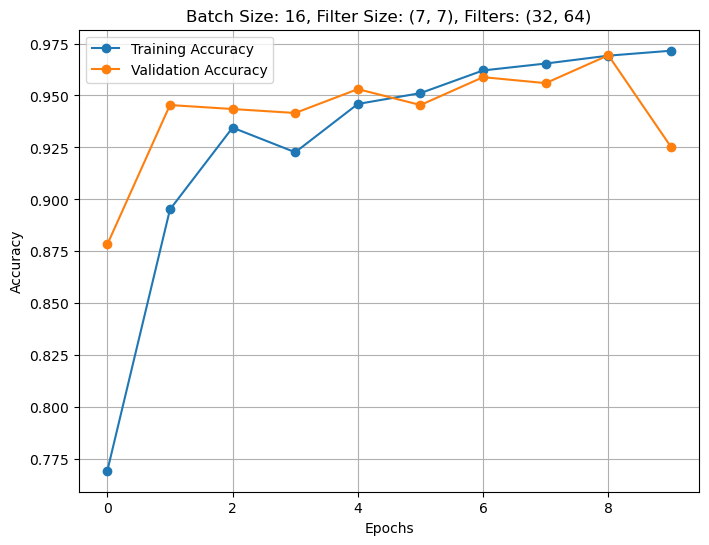

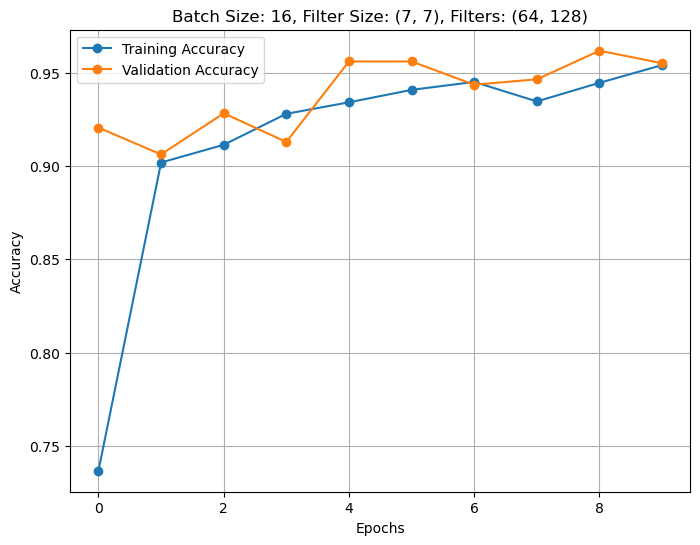

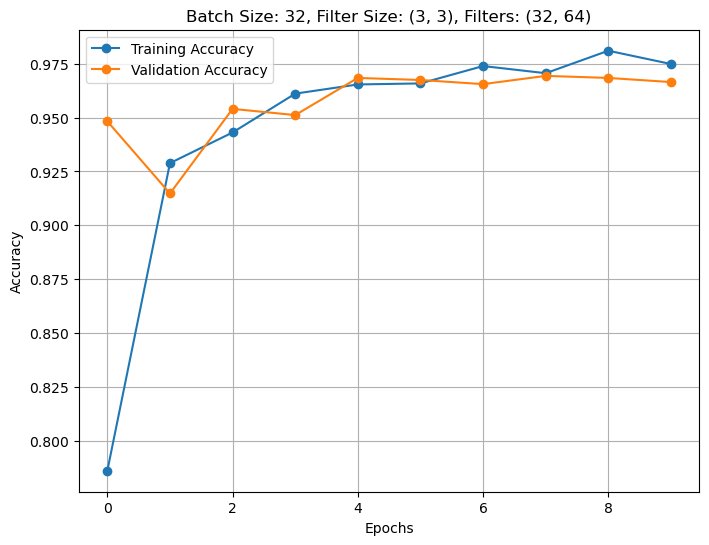

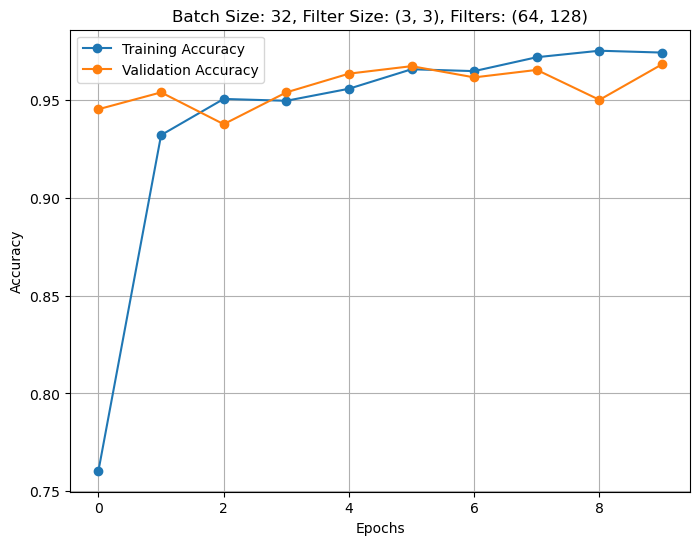

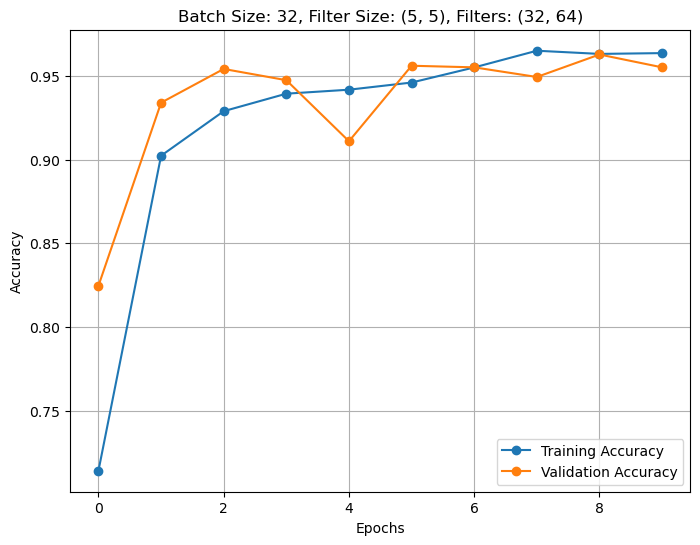

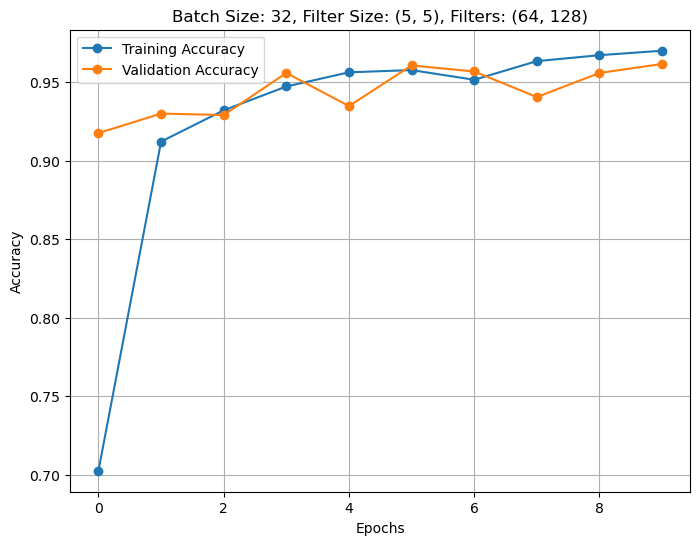

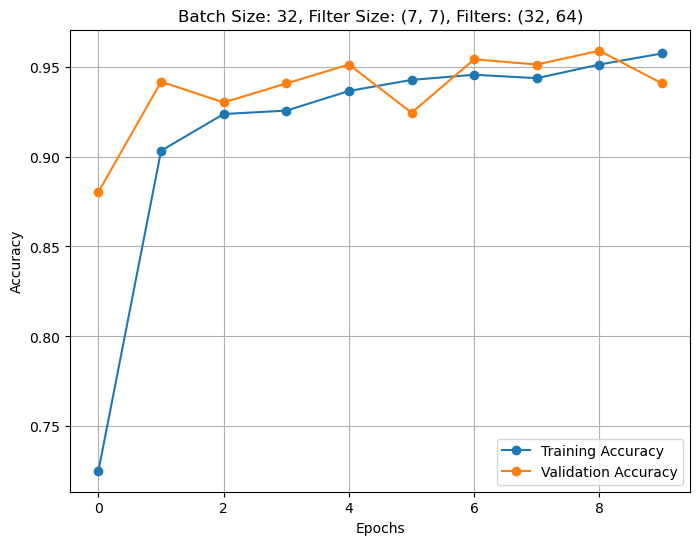

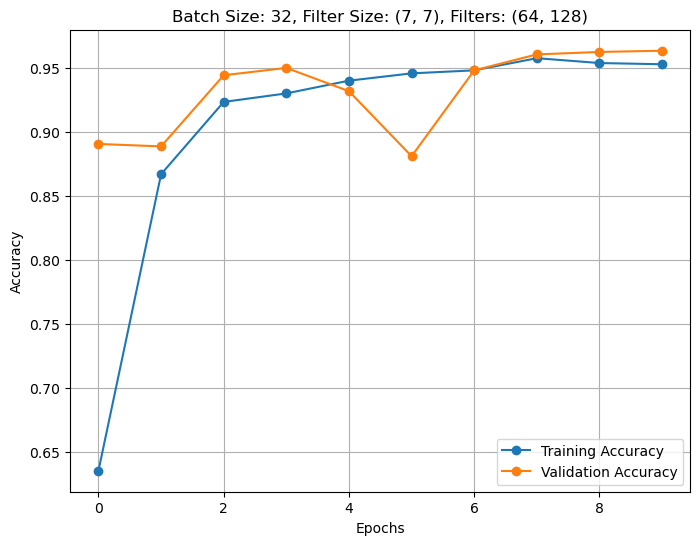

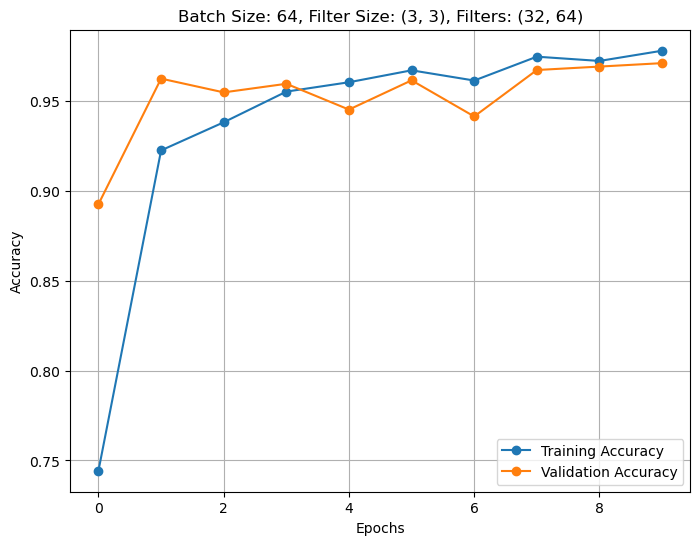

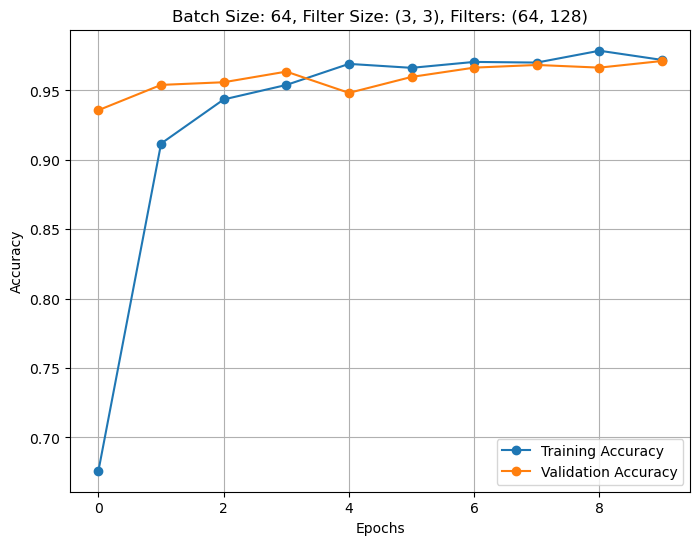

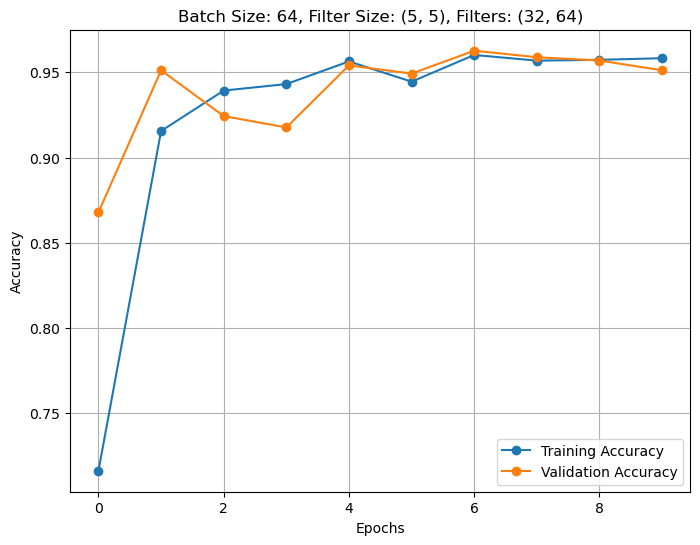

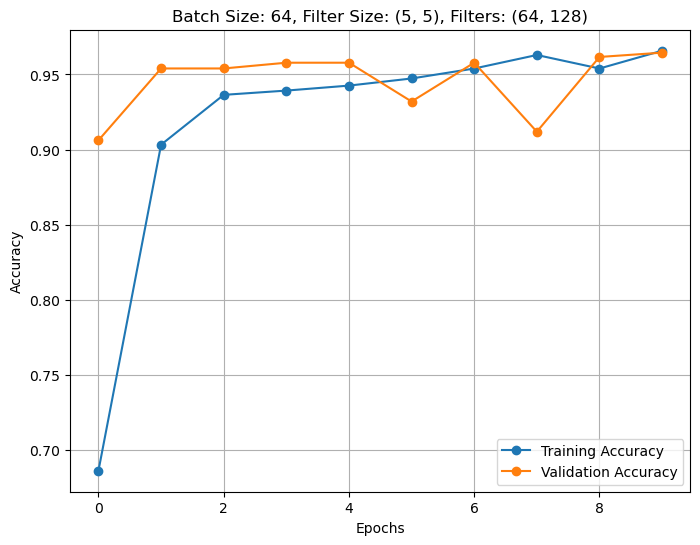

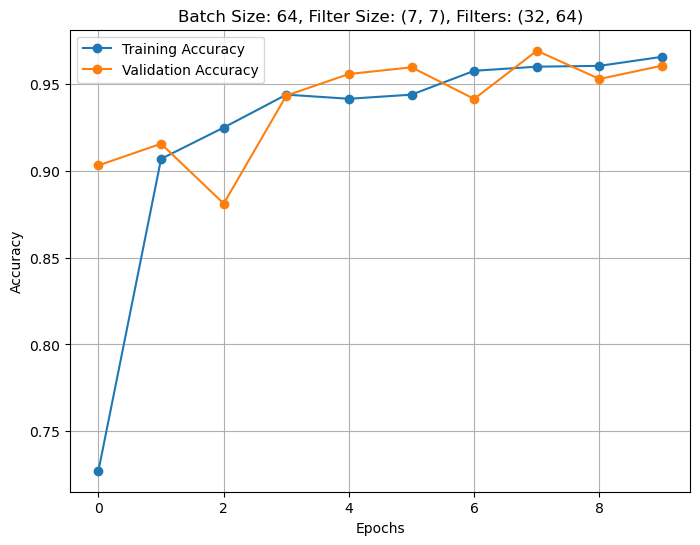

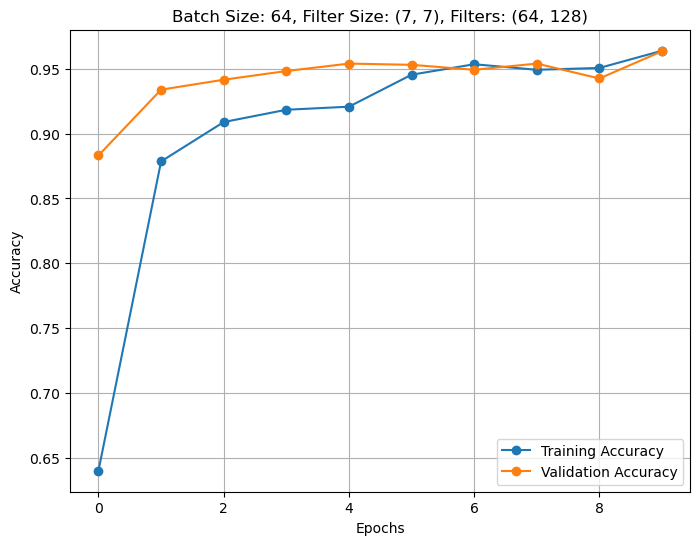

In [29]:
import matplotlib.pyplot as plt

for i, result in enumerate(results):
    plt.figure(figsize=(8, 6))
    history = result['history']
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title(f"Batch Size: {result['batch_size']}, Filter Size: {result['filter_size']}, Filters: {result['num_filters']}")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


2. Generate Training and Validation Accuracy Plots: For each combination of
hyperparameters, create a plot showing the training and validation accuracy over
epochs. Discuss the learning behavior observed, such as smoother trends or spikes in
validation accuracy.

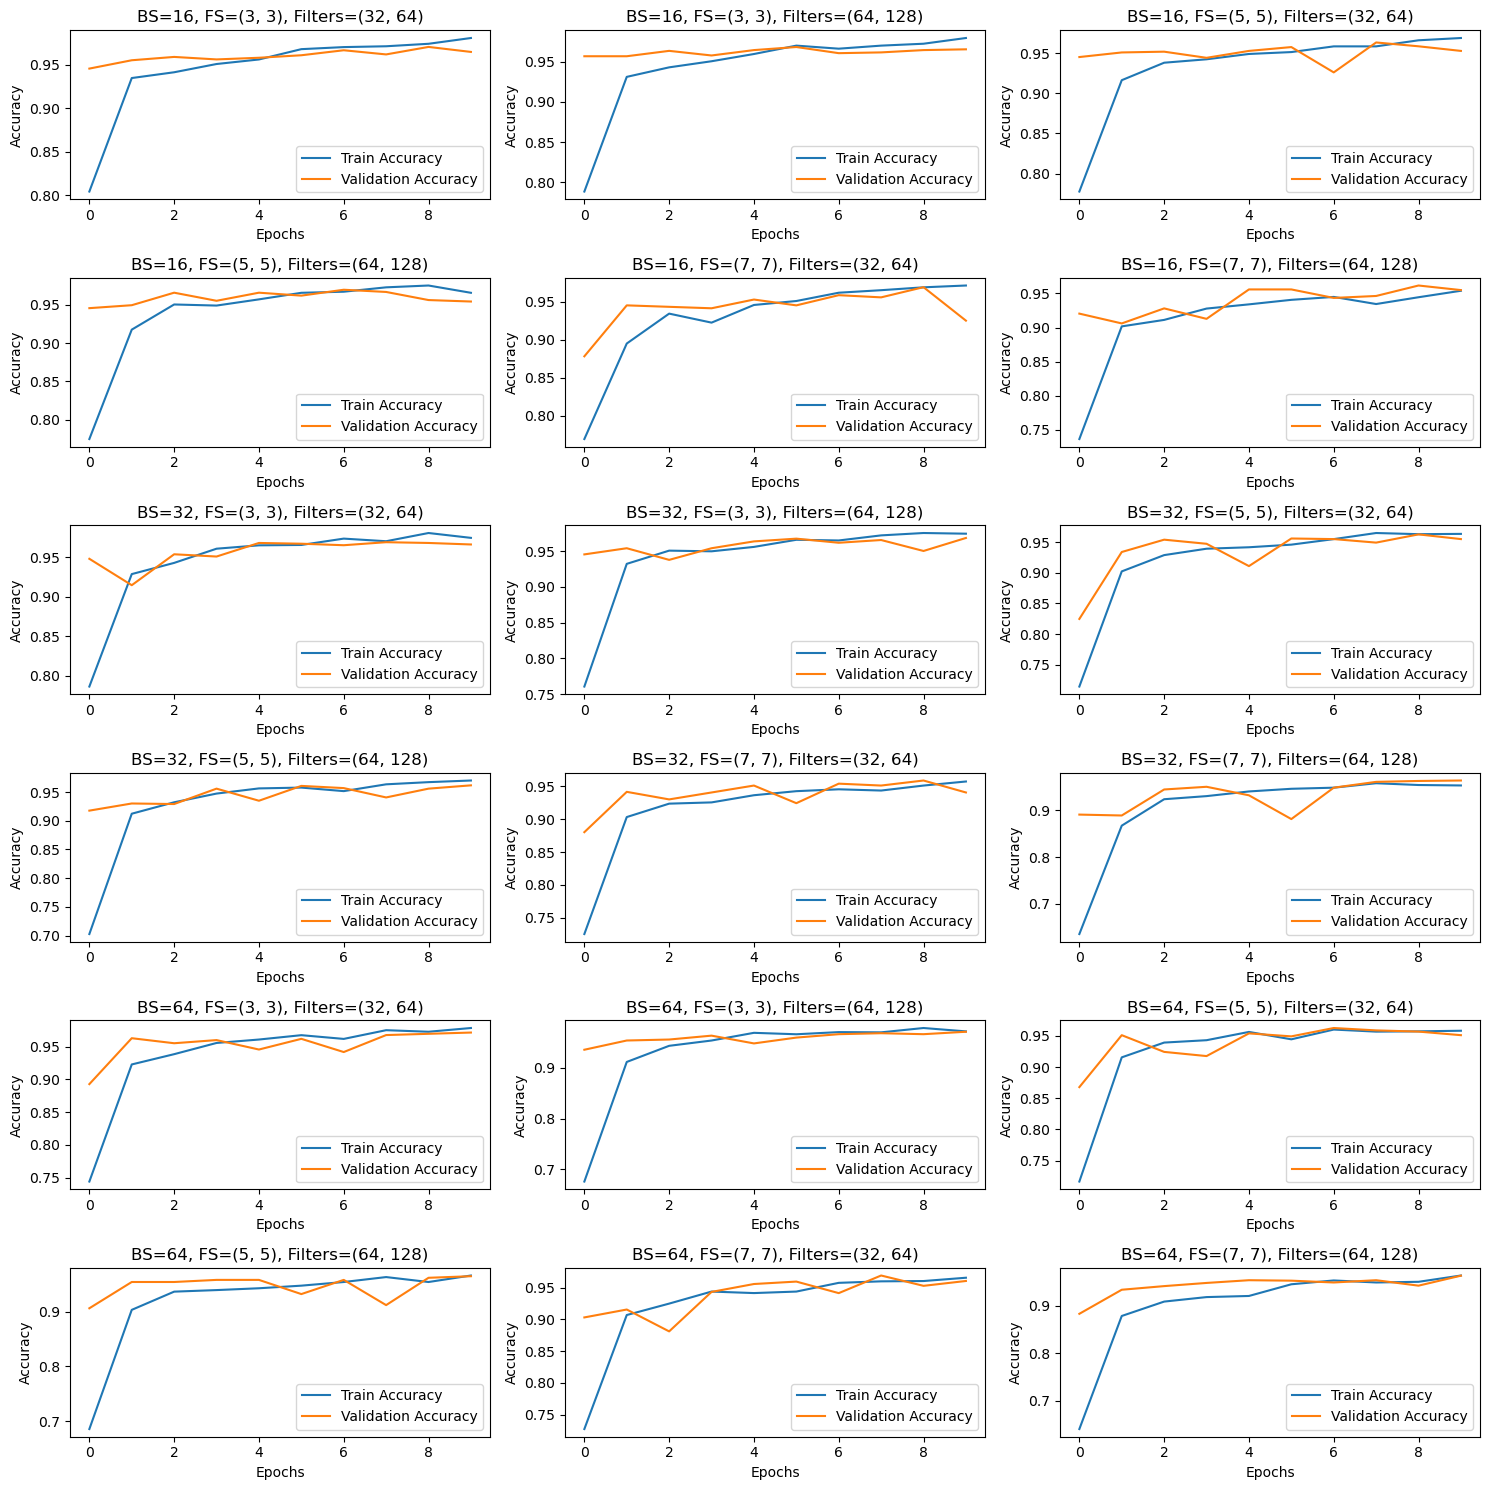

In [27]:
import matplotlib.pyplot as plt

# set grid size - 18 total
num_rows = 6
num_cols = 3

# holds subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# flatten axes
axes = axes.flatten()

# iterate through the results and plot each one
for i, result in enumerate(results):
    batch_size = result['batch_size']
    filter_size = result['filter_size']
    num_filters = result['num_filters']
    
    #training and validation accuracy from the history object
    train_acc = result['history'].history['accuracy']
    val_acc = result['history'].history['val_accuracy']
    
    # training and validation accuracy for each combination
    axes[i].plot(train_acc, label='Train Accuracy')
    axes[i].plot(val_acc, label='Validation Accuracy')
    
    # formatting
    axes[i].set_title(f'BS={batch_size}, FS={filter_size}, Filters={num_filters}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

# format spacing 
plt.tight_layout()
plt.show()

3. Compare All Models: Create a bar plot for validation accuracy of all models.
Summarize the results, highlighting the hyperparameter combinations that performed the
best.

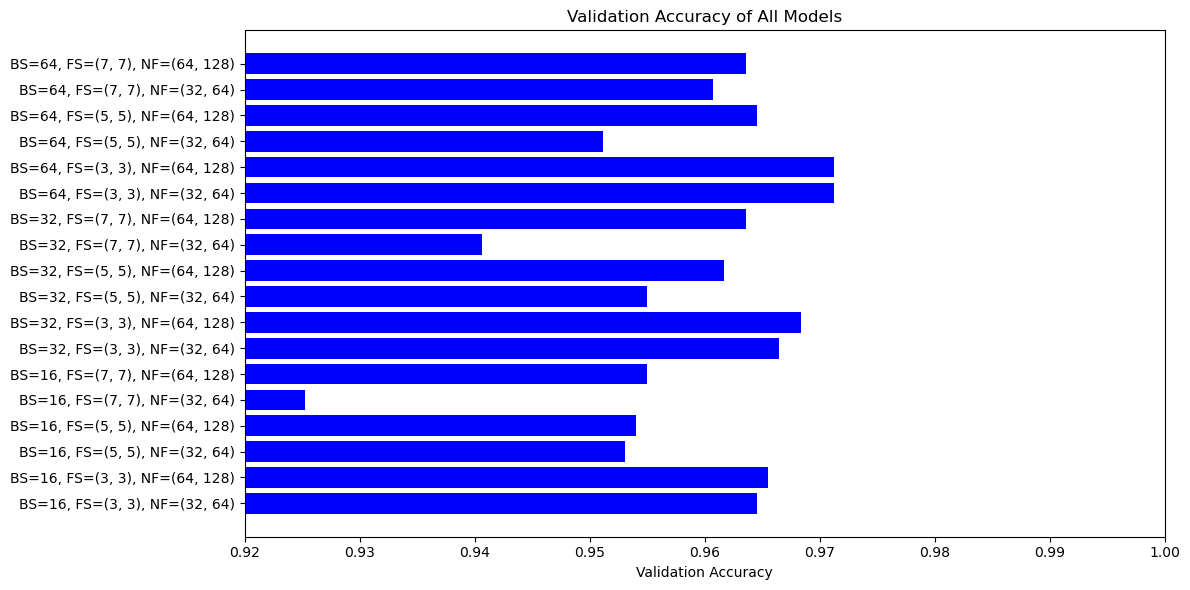

In [40]:
# get data for plot
labels = [f"BS={r['batch_size']}, FS={r['filter_size']}, NF={r['num_filters']}" for r in results]
val_accuracies = [r['val_accuracy'] for r in results]

# Bar plot
plt.figure(figsize=(12, 6))
plt.xlim(0.92,1)
plt.barh(labels, val_accuracies, color='blue')
plt.xlabel('Validation Accuracy')
plt.title('Validation Accuracy of All Models')
plt.tight_layout()
plt.show()

4. Identify the Worst and Best Models: Identify the best two and worst two models from
the results, focusing on their configurations (batch size, filter size, and number of filters).
Discuss the potential reasons behind their performance, considering factors such as
larger filters capturing broader features but losing finer details, or more filters capturing
richer patterns but increasing the risk of overfitting. These are examples; explore
additional factors to provide a thorough explanation of the outcomes.

In [34]:
# accuracy funct
def get_val_accuracy(result):
    return result['val_accuracy']

sorted_results = sorted(results, key=get_val_accuracy)

# Best and worst configurations
print("Worst Models:")
for i in range(2):
    print(f"Rank {i+1}: {sorted_results[i]}")

print("\nBest Models:")
for i in range(2):
    print(f"Rank {i+1}: {sorted_results[-(i+1)]}")

Best Models:
Rank 1: {'batch_size': 16, 'filter_size': (7, 7), 'num_filters': (32, 64), 'val_accuracy': 0.9252873659133911, 'history': <keras.src.callbacks.history.History object at 0x3932b9dc0>}
Rank 2: {'batch_size': 32, 'filter_size': (7, 7), 'num_filters': (32, 64), 'val_accuracy': 0.9406130313873291, 'history': <keras.src.callbacks.history.History object at 0x3b26bd490>}

Worst Models:
Rank 1: {'batch_size': 64, 'filter_size': (3, 3), 'num_filters': (64, 128), 'val_accuracy': 0.9712643623352051, 'history': <keras.src.callbacks.history.History object at 0x314840280>}
Rank 2: {'batch_size': 64, 'filter_size': (3, 3), 'num_filters': (32, 64), 'val_accuracy': 0.9712643623352051, 'history': <keras.src.callbacks.history.History object at 0x3d0fb91f0>}
